In [1]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_UNSW_NB15_1 import Dataset_UNSW_NB15_1
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_NID import Dataset_IoT_NID
from experiment import Experiment

In [2]:
dataset = Dataset_UNSW_NB15()
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)

In [ ]:
exp.run_noFS(k=500, c_attack=0.1, c_normal=0.1)

sampled data is :(500, 6)
sampled data is :(500, 6)
------------------------------
Feature selection: hybrid, n_fi=3, n_pca=3 k:500
Accuracy: 0.615
Accuracy in Attack Subsystem: 0.649
Accuracy in Normal Subsystem: 0.708
F1 Score: 0.670
F1 Score in Attack Subsystem: 0.648
F1 Score in Normal Subsystem: 0.706
Fit Time: 15.5s
Evaluate Time per Data: 7.1us
------------------------------


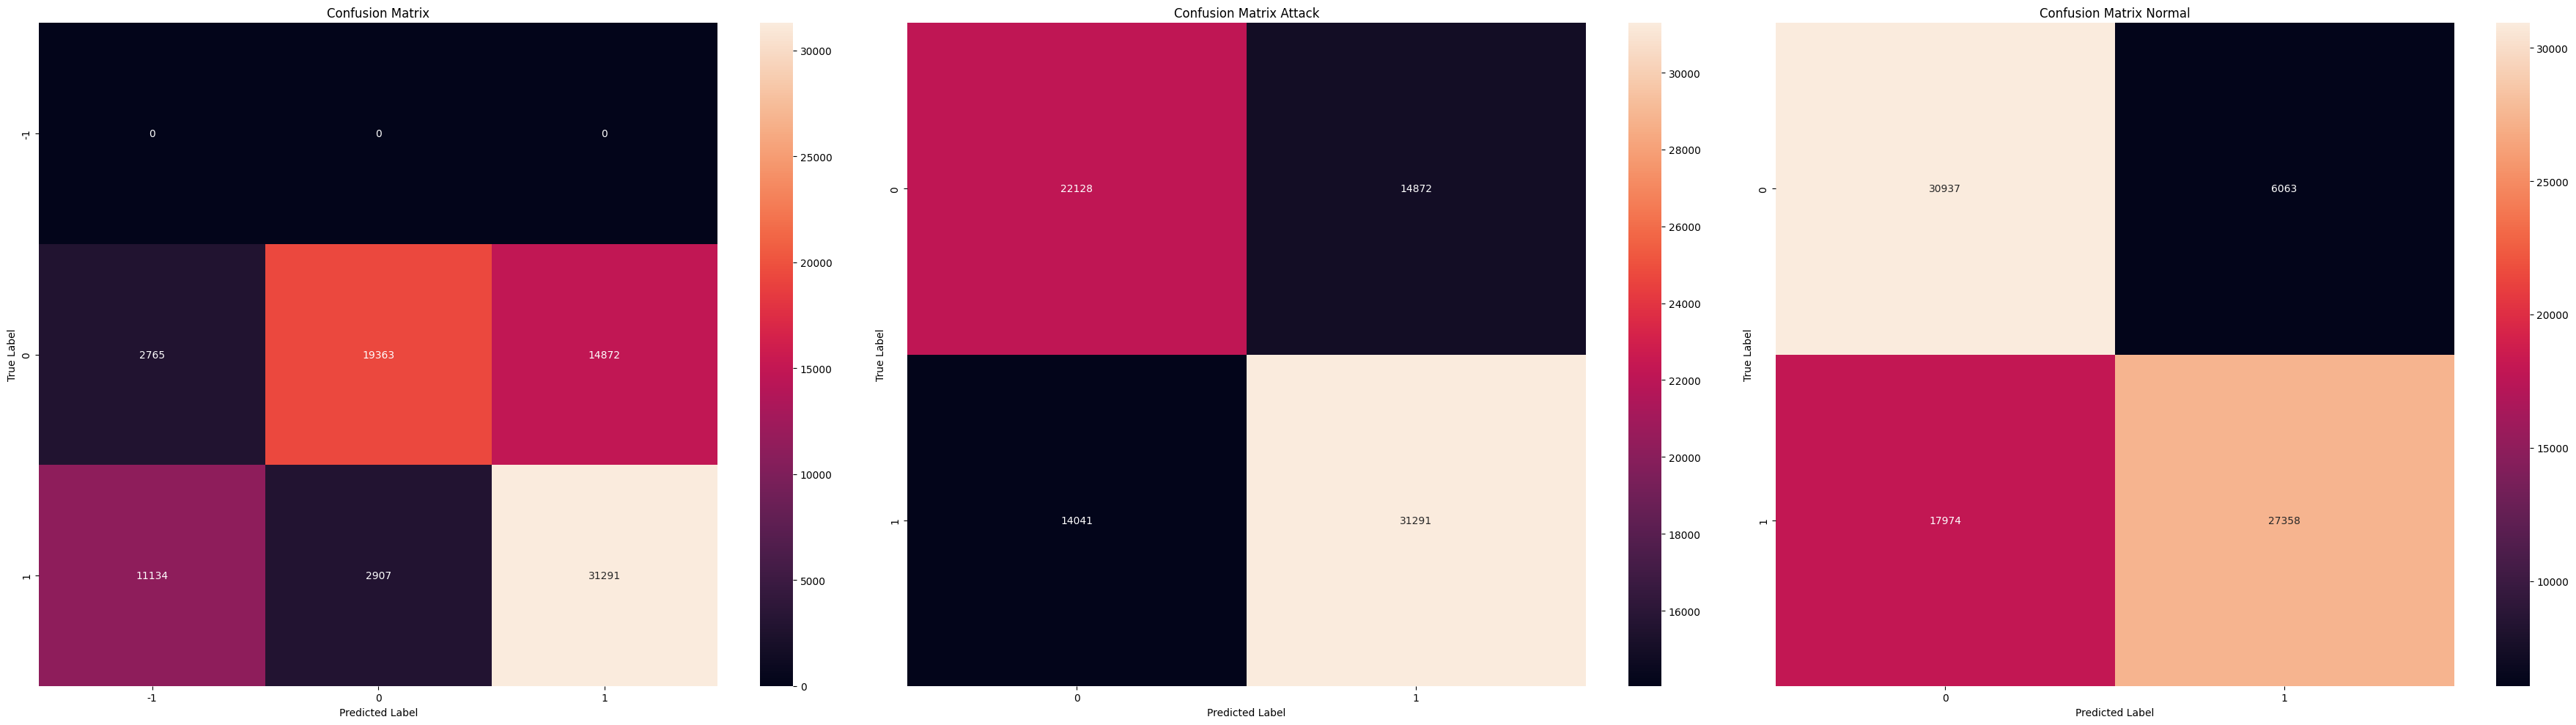

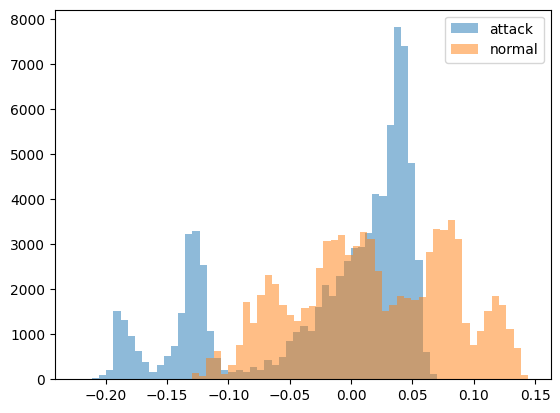

(7.061791599854848, 0.6152407326434436, 0.670237151233403)

In [3]:
exp.run_hybrid(k=500, n_fi=10, n_pca=1, c_attack=0.1, c_normal=0.1)

In [ ]:
exp.run_mean(k=500, n_features=10, c_attack=0.095, c_normal=0.1)

In [ ]:
exp.run_var(k=500, n_ohe=10, nnum=10, c_attack=0.1, c_normal=0.1)

In [ ]:
dataset = Dataset_NSL_KDD()
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)

In [ ]:
exp.run_noFS(k=500, c_attack=0.1, c_normal=0.1)

In [ ]:
exp.run_hybrid(k=500, n_fi=10, n_pca=1, c_attack=0.1, c_normal=0.1)

In [ ]:
exp.run_mean(k=500, n_features=30, c_attack=0.1, c_normal=0.1)

In [ ]:
exp.run_var(k=500, t_ohe=0.01, t_num=0.01, c_attack=0.1, c_normal=0.1)

In [ ]:
dataset = Dataset_IoT_NID()
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)

In [ ]:
exp.run_noFS(k=500, c_attack=0.1, c_normal=0.1)

In [ ]:
exp.run_hybrid(k=500, n_fi=1, n_pca=1, c_attack=0.1, c_normal=0.1)

In [ ]:
exp.run_mean(k=500, n_features=10, c_attack=0.1, c_normal=0.1)

In [ ]:
exp.run_var(k=500, t_ohe=0.01, t_num=0.05, c_attack=0.1, c_normal=0.1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# データセットと手法のリスト（これらのクラスの定義が必要です）
datasets = [Dataset_NSL_KDD(), Dataset_UNSW_NB15(), Dataset_IoT_NID()]
methods = ["hybrid", "mean", "var"]

# 評価結果を保存するための辞書
results = {
    "time": np.zeros((len(datasets), len(methods))),
    "accuracy": np.zeros((len(datasets), len(methods))),
    "f1score": np.zeros((len(datasets), len(methods))),
}

# 各データセットと手法の組み合わせに対して評価を行う
for i, dataset in enumerate(datasets):
    X_train, X_test, y_train, y_test, config = dataset.get_data()
    exp = Experiment(X_train, X_test, y_train, y_test, config)
    
    for j, method in enumerate(methods):
        if method == "hybrid":
            time, accuracy, f1score = exp.run_hybrid(k=500, n_fi=10, n_pca=1, c_attack=0.1, c_normal=0.1)
        elif method == "mean":
            time, accuracy, f1score = exp.run_mean(k=500, n_features=10, c_attack=0.1, c_normal=0.1)
        elif method == "var":
            time, accuracy, f1score = exp.run_var(k=500, n_ohe=5, n_num=5, c_attack=0.1, c_normal=0.1)
        
        results["time"][i, j], results["accuracy"][i, j], results["f1score"][i, j] = time, accuracy, f1score

# カラーを指定
colors = ['skyblue', 'lightgreen', 'gray']

# 結果をグラフに表示する
dataset_names = ["NSL-KDD", "UNSW-NB15", "IoTID20"]
method_names = ["PCA + Feature Importance", "Mean Diffearence Selection", "Varience based Selection"]
metrics_name = ["Evaluate Time per Data(us)", "Accuracy", "F1-Score"]
bar_width = 0.2  # バーの太さ
index = np.arange(len(methods))

for metric_index, (metric, values) in enumerate(results.items()):
    plt.figure(figsize=(10, 6))
    for i in range(len(datasets)):
        plt.bar(index + i*bar_width, values[i, :], width=bar_width, color=colors[i], label=dataset_names[i], edgecolor='gray')
    
    plt.title(f'{metrics_name[metric_index]}')
    plt.xlabel('Method')
    plt.ylabel(metric.capitalize())
    plt.xticks(index + bar_width, method_names)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 凡例をグラフの外側に配置
    plt.tight_layout()
    plt.show()

print(results["time"])
print(results["accuracy"])
print(results["f1score"])

In [ ]:
# XGboostを用いて判定を行う
import xgboost as xgb
import time
import numpy as np
from sklearn.preprocessing import OneHotEncoder

dataset = Dataset_IoT_NID()
X_train, X_test, y_train, y_test, config = dataset.get_data()
ohe = OneHotEncoder(sparse_output=False, categories='auto', handle_unknown='ignore')
X_ohe = ohe.fit_transform(X_train[config["categorical_columns"]])  
X_train = np.concatenate([X_train.drop(config["categorical_columns"], axis=1).values, X_ohe], axis=1)  # 配列のリストを渡す

X_ohe = ohe.transform(X_test[config["categorical_columns"]])  
X_test = np.concatenate([X_test.drop(config["categorical_columns"], axis=1).values, X_ohe], axis=1)  # 配列のリストを渡す

xgb_model = xgb.XGBC()  # xgbという名前の変数はすでにimport xgboost as xgbで使用されているため、変数名を変更
xgb_model.fit(X_train, y_train)
start_time = time.time()
y_pred = xgb_model.predict(X_test)
end_time = time.time()

evaluate_time_per_data = round((end_time - start_time) *1000000 / len(y_test), 2)
print(f"evaluate time per data: {evaluate_time_per_data} us")

In [ ]:
# 必要なライブラリをインポート
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# データセットを取得
dataset = Dataset_IoT_NID()
X_train, X_test, y_train, y_test, config = dataset.get_data()

# OneHotEncoderを設定
ohe = OneHotEncoder(sparse_output=False, categories='auto', handle_unknown='ignore')

# カテゴリカルな特徴量をOneHotEncoding
X_ohe = ohe.fit_transform(X_train[config["categorical_columns"]])  
X_train = np.concatenate([X_train.drop(config["categorical_columns"], axis=1).values, X_ohe], axis=1)

X_ohe = ohe.transform(X_test[config["categorical_columns"]])  
X_test = np.concatenate([X_test.drop(config["categorical_columns"], axis=1).values, X_ohe], axis=1)

# アルゴリズムのリストを作成
algorithms = [xgb.XGBClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

# 各アルゴリズムについて
for algorithm in algorithms:
    # モデルを訓練
    algorithm.fit(X_train, y_train)
    
    # 評価時間を計測
    start_time = time.time()
    y_pred = algorithm.predict(X_test)
    end_time = time.time()

    # 評価時間を計算
    evaluate_time_per_data = round((end_time - start_time) *1000000 / len(y_test), 2)
    
    # 結果を表示
    print(f"Algorithm: {type(algorithm).__name__}, evaluate time per data: {evaluate_time_per_data} us")